# News classification model using Naive Bayes Classification method

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
#defining all categories
categories=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
#training the data on these categories
train=fetch_20newsgroups(subset='train',categories=categories)
#testing the data on these categories
test=fetch_20newsgroups(subset='test',categories=categories)
#printing the  training data value at 5th position data 

print(test.data[5])
#printing the length of the training data
print(len(train.data))

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer #<-- these weights different words in the document based on many features like from,crime etc as per the appearence
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline #<--these is used for information transfer
#creating a model based on multinomial naive bayes
model=make_pipeline(TfidfVectorizer(),MultinomialNB())#<--the information we are getting in TfidfVectorizer is pumped in MultinomialNM() using make_pipeline function

#training the model with the train data
model.fit(train.data,train.target)

#creating the label for test data
labels=model.predict(test.data)


Text(92.68,0.5,'predicted labels')

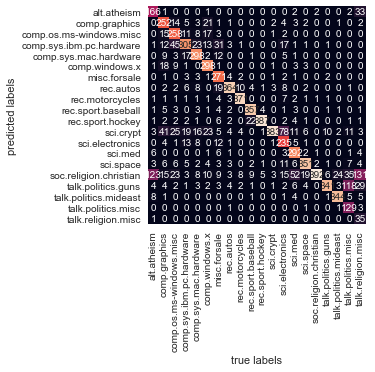

In [21]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
#plotting heatmap of confusion matrix
plt.xlabel("true labels")
plt.ylabel("predicted labels")

In [28]:
#predicting categories on new data based on trained data
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    print(pred)
    return train.target_names[pred[0]]
    
predict_category("i love u")


[15]


'soc.religion.christian'

In [30]:
predict_category('car is better than bus')

[7]


'rec.autos'

In [33]:
predict_category('he is in space for a week ')

[14]


'sci.space'